<h3>Testing Notebook</h3>

In [1]:
import sys
sys.path.append('..')

In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [2]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288 # replicated

In [3]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [4]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [5]:
data = Dataset(ligands, polarization, replicas, size)

In [6]:
%%time
for _ in data:
    pass

Wall time: 42 ms


In [7]:
data.data.shape

(69552, 98, 1)

In [8]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [10]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
X_len, test_len = int(len(data.data) * 0.9), int(len(data.data) * 0.1)
train_len, val_len = int(X_len * 0.9), int(X_len * 0.1)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

62596 6955 56336 6259
69551 69552


In [12]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [13]:
data.data[1000].shape
len(data)

69552

In [58]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len+1]) # still np arrays

In [15]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [16]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

979 109 1088


<h3>Model Training</h3>

In [17]:
from core.network import *
from core.trainer import *

In [18]:
torch.cuda.is_available()

True

In [19]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 50
batch_size = 64
learning_rate = 1e-3

In [20]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=3, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [21]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [22]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  2%|█▋                                                                                 | 1/50 [00:11<09:37, 11.79s/it]

Epoch 001: | Training Loss: 2.1861717384365655 | Validation Loss: 2.195074433580451


  4%|███▎                                                                               | 2/50 [00:22<09:05, 11.36s/it]

Epoch 002: | Training Loss: 2.195399389081883 | Validation Loss: 2.198655397520153


  6%|████▉                                                                              | 3/50 [00:33<08:48, 11.24s/it]

Epoch 003: | Training Loss: 2.183146178905031 | Validation Loss: 2.16025888810464


  8%|██████▋                                                                            | 4/50 [00:44<08:31, 11.11s/it]

Epoch 004: | Training Loss: 2.1838312343874065 | Validation Loss: 2.1900034694496644


 10%|████████▎                                                                          | 5/50 [00:55<08:17, 11.06s/it]

Epoch 005: | Training Loss: 2.1498245849550925 | Validation Loss: 2.1064340455816426


 12%|█████████▉                                                                         | 6/50 [01:07<08:09, 11.13s/it]

Epoch 006: | Training Loss: 2.081165746356664 | Validation Loss: 2.118084357419145


 14%|███████████▌                                                                       | 7/50 [01:18<07:59, 11.14s/it]

Epoch 007: | Training Loss: 2.0280926456490382 | Validation Loss: 1.9621475158481423


 16%|█████████████▎                                                                     | 8/50 [01:29<07:42, 11.02s/it]

Epoch 008: | Training Loss: 1.9638372926351608 | Validation Loss: 1.949774362625332


 18%|██████████████▉                                                                    | 9/50 [01:39<07:30, 11.00s/it]

Epoch 009: | Training Loss: 1.8994027311638744 | Validation Loss: 1.8552037619669504


 20%|████████████████▍                                                                 | 10/50 [01:50<07:19, 10.99s/it]

Epoch 010: | Training Loss: 1.7445263390156296 | Validation Loss: 1.677029773729657


 22%|██████████████████                                                                | 11/50 [02:01<07:08, 11.00s/it]

Epoch 011: | Training Loss: 1.6519112466426378 | Validation Loss: 1.617369040436701


 24%|███████████████████▋                                                              | 12/50 [02:13<06:58, 11.01s/it]

Epoch 012: | Training Loss: 1.5927457988444826 | Validation Loss: 1.5684566935268016


 26%|█████████████████████▎                                                            | 13/50 [02:24<06:48, 11.03s/it]

Epoch 013: | Training Loss: 1.5484836848568746 | Validation Loss: 1.5334426459916142


 28%|██████████████████████▉                                                           | 14/50 [02:35<06:36, 11.00s/it]

Epoch 014: | Training Loss: 1.5042139089631108 | Validation Loss: 1.5096503430550252


 30%|████████████████████████▌                                                         | 15/50 [02:46<06:26, 11.05s/it]

Epoch 015: | Training Loss: 1.4652520951503873 | Validation Loss: 1.4632196218595592


 32%|██████████████████████████▏                                                       | 16/50 [02:57<06:17, 11.11s/it]

Epoch 016: | Training Loss: 1.4235849469991455 | Validation Loss: 1.4255224422577324


 34%|███████████████████████████▉                                                      | 17/50 [03:08<06:06, 11.10s/it]

Epoch 017: | Training Loss: 1.373803466893314 | Validation Loss: 1.3835525315835935


 36%|█████████████████████████████▌                                                    | 18/50 [03:19<05:55, 11.10s/it]

Epoch 018: | Training Loss: 1.3387490832403806 | Validation Loss: 1.3519029157971023


 38%|███████████████████████████████▏                                                  | 19/50 [03:30<05:45, 11.13s/it]

Epoch 019: | Training Loss: 1.2913336573630967 | Validation Loss: 1.3042580895467635


 40%|████████████████████████████████▊                                                 | 20/50 [03:42<05:34, 11.16s/it]

Epoch 020: | Training Loss: 1.252428068386522 | Validation Loss: 1.25557224684899


 42%|██████████████████████████████████▍                                               | 21/50 [03:53<05:24, 11.20s/it]

Epoch 021: | Training Loss: 1.223481023579501 | Validation Loss: 1.2398663174121751


 44%|████████████████████████████████████                                              | 22/50 [04:04<05:13, 11.21s/it]

Epoch 022: | Training Loss: 1.19439160403728 | Validation Loss: 1.2282409312528209


 46%|█████████████████████████████████████▋                                            | 23/50 [04:15<05:02, 11.20s/it]

Epoch 023: | Training Loss: 1.1619620169146676 | Validation Loss: 1.1988469526308392


 48%|███████████████████████████████████████▎                                          | 24/50 [04:27<04:51, 11.22s/it]

Epoch 024: | Training Loss: 1.1357268826223612 | Validation Loss: 1.1883450358285816


 50%|█████████████████████████████████████████                                         | 25/50 [04:38<04:39, 11.18s/it]

Epoch 025: | Training Loss: 1.1018960854615083 | Validation Loss: 1.163523325679499


 52%|██████████████████████████████████████████▋                                       | 26/50 [04:48<04:26, 11.09s/it]

Epoch 026: | Training Loss: 1.0781755360933563 | Validation Loss: 1.1555920297946405


 54%|████████████████████████████████████████████▎                                     | 27/50 [04:59<04:13, 11.03s/it]

Epoch 027: | Training Loss: 1.0483382095842488 | Validation Loss: 1.1456666468480312


 56%|█████████████████████████████████████████████▉                                    | 28/50 [05:10<04:01, 10.98s/it]

Epoch 028: | Training Loss: 1.0243952645101149 | Validation Loss: 1.1322400493359348


 58%|███████████████████████████████████████████████▌                                  | 29/50 [05:21<03:49, 10.95s/it]

Epoch 029: | Training Loss: 0.9943353639072734 | Validation Loss: 1.1039404748776638


 60%|█████████████████████████████████████████████████▏                                | 30/50 [05:32<03:38, 10.93s/it]

Epoch 030: | Training Loss: 0.9637522719366679 | Validation Loss: 1.0910722848472245


 62%|██████████████████████████████████████████████████▊                               | 31/50 [05:43<03:27, 10.93s/it]

Epoch 031: | Training Loss: 0.9299920378471663 | Validation Loss: 1.07264166796973


 64%|████████████████████████████████████████████████████▍                             | 32/50 [05:54<03:17, 10.96s/it]

Epoch 032: | Training Loss: 0.8956643458649867 | Validation Loss: 1.031927043144856


 66%|██████████████████████████████████████████████████████                            | 33/50 [06:05<03:05, 10.93s/it]

Epoch 033: | Training Loss: 0.875452128749824 | Validation Loss: 1.0356337357004848


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [06:16<02:54, 10.92s/it]

Epoch 034: | Training Loss: 0.8357225294558824 | Validation Loss: 1.0060431891625081


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [06:27<02:43, 10.89s/it]

Epoch 035: | Training Loss: 0.8066390966796778 | Validation Loss: 1.0054120547180876


 72%|███████████████████████████████████████████████████████████                       | 36/50 [06:37<02:32, 10.87s/it]

Epoch 036: | Training Loss: 0.7882968052171467 | Validation Loss: 0.9766924572647164


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [06:48<02:21, 10.89s/it]

Epoch 037: | Training Loss: 0.7446703735179628 | Validation Loss: 0.9971509772703189


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [07:00<02:12, 11.02s/it]

Epoch 038: | Training Loss: 0.7229945652027052 | Validation Loss: 0.9407692420373269


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [07:12<02:05, 11.38s/it]

Epoch 039: | Training Loss: 0.7150679937543859 | Validation Loss: 0.9301482510129246


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [07:24<01:54, 11.49s/it]

Epoch 040: | Training Loss: 0.6685164015553702 | Validation Loss: 0.9116950286637753


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [07:35<01:42, 11.42s/it]

Epoch 041: | Training Loss: 0.6643124372223668 | Validation Loss: 0.8820376029802025


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [07:46<01:30, 11.33s/it]

Epoch 042: | Training Loss: 0.6327381454583207 | Validation Loss: 0.8794371947782849


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [07:57<01:18, 11.27s/it]

Epoch 043: | Training Loss: 0.6174208696882133 | Validation Loss: 0.9627918453391539


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [08:09<01:08, 11.49s/it]

Epoch 044: | Training Loss: 0.6089925513630381 | Validation Loss: 0.8646463489313738


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [08:21<00:58, 11.67s/it]

Epoch 045: | Training Loss: 0.5676387556665886 | Validation Loss: 0.8685599603784193


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [08:33<00:46, 11.62s/it]

Epoch 046: | Training Loss: 0.5517882302144697 | Validation Loss: 0.8294259790980488


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [08:44<00:34, 11.60s/it]

Epoch 047: | Training Loss: 0.5331541312129766 | Validation Loss: 0.8405635630318878


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [08:56<00:23, 11.59s/it]

Epoch 048: | Training Loss: 0.5477200358101492 | Validation Loss: 0.9301151283290408


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [09:07<00:11, 11.50s/it]

Epoch 049: | Training Loss: 0.5002917894243099 | Validation Loss: 0.8475379878227863


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [09:18<00:00, 11.18s/it]

Epoch 050: | Training Loss: 0.5148414841589573 | Validation Loss: 0.8094815956343204


<h3>Evaluation</h3>

In [23]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:6956]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [24]:
df

,y_pred,y_true
0,7,2
1,4,4
2,5,5
3,0,0
4,3,3
...,...,...
6951,6,6
6952,0,4
6953,3,3
6954,7,7


In [25]:
print(f' Accuracy: {sum(df["y_pred"] == df["y_true"])/6956}')

 Accuracy: 0.7573317998849913


In [26]:
import pickle
import os
# torch.save(model.state_dict(), '../models/lstm3.pth')

<h3>Plots</h3>

In [27]:
import matplotlib.pyplot as plt

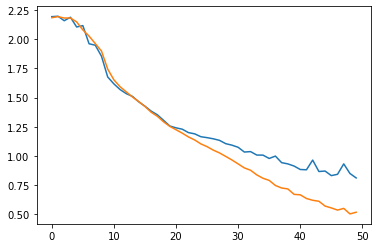

In [28]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

3 LSTM layer seems to have even better accuracy, could continue optimizing parameters further

<h3>Classification Report</h3>

In [57]:
# not a holistic look at the data

In [29]:
import sklearn.metrics

In [44]:
report = sklearn.metrics.classification_report(dic["y_true"], dic["y_pred"], target_names=ligands, output_dict=True)
rep = pd.DataFrame(report).transpose()

In [45]:
rep

,precision,recall,f1-score,support
TNF,0.701840,0.741894,0.721311,771.000000
R84,0.831750,0.807642,0.819519,759.000000
PIC,0.819163,0.825850,0.822493,735.000000
P3K,0.711387,0.796717,0.751638,792.000000
FLA,0.705882,0.634021,0.668024,776.000000
CpG,0.671679,0.660099,0.665839,812.000000
FSL,0.675845,0.682680,0.679245,791.000000
LPS,0.722607,0.681937,0.701684,764.000000
UST,0.993430,1.000000,0.996704,756.000000
accuracy,0.757332,0.757332,0.757332,0.757332


In [52]:
confusion = sklearn.metrics.confusion_matrix(dic["y_true"], dic["y_pred"])
plot = sklearn.metrics.ConfusionMatrixDisplay(confusion)

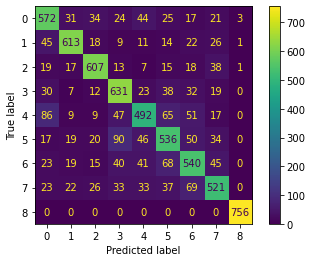

In [56]:
plot.plot()